In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#Normalizar valores de píxeles a [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [3]:
#Definir la arquitectura CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 clases
])

In [4]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
#Entrenar el modelo
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

#Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nPrecisión en test: {test_acc:.4f}")

Epoch 1/10
625/625 [==============================] - 15s 24ms/step - loss: 1.6359 - accuracy: 0.4034 - val_loss: 1.4091 - val_accuracy: 0.4940
Epoch 2/10
625/625 [==============================] - 20s 32ms/step - loss: 1.2740 - accuracy: 0.5464 - val_loss: 1.2191 - val_accuracy: 0.5740
Epoch 3/10
625/625 [==============================] - 23s 37ms/step - loss: 1.1261 - accuracy: 0.6038 - val_loss: 1.1192 - val_accuracy: 0.6094
Epoch 4/10
625/625 [==============================] - 17s 28ms/step - loss: 1.0239 - accuracy: 0.6405 - val_loss: 1.0577 - val_accuracy: 0.6307
Epoch 5/10
625/625 [==============================] - 17s 28ms/step - loss: 0.9560 - accuracy: 0.6642 - val_loss: 1.0120 - val_accuracy: 0.6455
Epoch 6/10
625/625 [==============================] - 18s 29ms/step - loss: 0.8921 - accuracy: 0.6878 - val_loss: 0.9437 - val_accuracy: 0.6732
Epoch 7/10
625/625 [==============================] - 18s 29ms/step - loss: 0.8382 - accuracy: 0.7061 - val_loss: 0.9072 - val_accuracy:

In [6]:
#Mostrar algunas imágenes con predicciones
class_names = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):.2f}%)\nReal: {class_names[true_label]}", color=color)

1/1 [==============================] - 0s 91ms/step


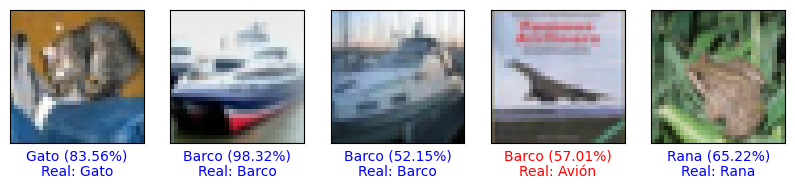

In [7]:
def mostrar_predicciones(n=5):
    predictions = model.predict(x_test[:n])
    plt.figure(figsize=(10,5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plot_image(i, predictions[i], y_test, x_test)
    plt.show()

mostrar_predicciones()